#### An overview of datasets

*User Reviews for Businesses*

**review_id**: Unique identifier for each review.

**user_id**: References the user who wrote the review.

**business_id**: References the business being reviewed.

**stars**: The rating given by the user (1-5).

**text**: The actual review text.

*User Information*

**user_id**: Unique identifier for each user.

**name**: User’s name.

**review_count**: Number of reviews the user has written.

**yelping_since**: When the user started writing reviews.

**friends**: List of user_ids that this user is connected to.

**fans**: Number of users who have marked this user as a favorite.

**average_stars**: The average rating given by the user across all their reviews.


*Business Information*

**business_id**: Unique identifier for each business.

**name**: Name of the business.

**address, city, state**: Location details.

**stars**: Average rating of the business based on all user reviews.

**review_count**: Number of reviews for the business.

**categories**: Business categories (e.g., restaurants, fitness, etc.).


*User Tips about Businesses*

**user_id**: References the user giving the tip.

**business_id**: References the business that the tip is about

**text**: Content of the tip.

**date**: When the tip was posted.


*User Check-ins to Businesses*

**business_id**: References the business being checked into.

**date**: A list of dates when check-ins happened





### Relationships Between Datasets

Here’s a summary of how these datasets relate to each other and how they can be useful for GNN-based modeling:

User-Business Relationships (via Reviews):

Users (user_id in users.json) write reviews (review_id in reviews.json) for businesses (business_id in business.json).
This forms a bipartite graph where users and businesses are nodes, and reviews are edges connecting them.
User-User Relationships (via Friends):

Users have friends (friends in users.json), which creates a social network between users. This can be represented as edges between user nodes.
User-Business Relationships (via Tips and Check-ins):

Tips (tips.json) and check-ins (checkin.json) add additional edges between users and businesses. These can be treated as different edge types in a heterogeneous graph.
Business-Business Relationships (via Categories and Location):

Businesses that share similar categories or are located in the same area may be connected. You can use categories and location (e.g., city, state) from business.json to connect businesses together.

#### Extracting only 20k records and save them as csv file for analysis

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import json
import geopandas as gpd

plt.rcParams['figure.figsize'] = [12, 6]

In [20]:


# Function to read JSON and sample records
def sample_json_to_csv(json_file_path, csv_file_path, sample_size=20000):
    # Read the JSON file
    with open(json_file_path, 'r',  encoding='utf-8') as file:
        data = [json.loads(line) for line in file]
    
    # Create a DataFrame
    df = pd.DataFrame(data)
    
    # Sample the DataFrame
    if len(df) > sample_size:
        df_sample = df.sample(n=sample_size, random_state=42)
    else:
        df_sample = df  # If dataset is smaller than sample size, take all
    
    # Save to CSV
    df_sample.to_csv(csv_file_path, index=False)
    print(f'Sampled data saved to {csv_file_path}')

# Paths to your JSON files
review_file_path = r'C:\Users\vivek\Downloads\yelp_dataset\yelp_academic_dataset_review.json'
user_file_path = r'C:\Users\vivek\Downloads\yelp_dataset\yelp_academic_dataset_user.json'
tip_file_path = r'C:\Users\vivek\Downloads\yelp_dataset\yelp_academic_dataset_tip.json'
checkin_file_path = r'C:\Users\vivek\Downloads\yelp_dataset\yelp_academic_dataset_checkin.json'
business_file_path = r'C:\Users\vivek\Downloads\yelp_dataset\yelp_academic_dataset_business.json'

# Paths for the output CSV files
sample_review_csv_path = 'sample_review.csv'
sample_user_csv_path = 'sample_user.csv'
sample_tip_csv_path = 'sample_tip.csv'
sample_checkin_csv_path = 'sample_checkin.csv'
sample_business_csv_path = 'sample_business.csv'

# Sample each dataset and save as CSV
# sample_json_to_csv(review_file_path, sample_review_csv_path)
# sample_json_to_csv(user_file_path, sample_user_csv_path)
# sample_json_to_csv(tip_file_path, sample_tip_csv_path)
# sample_json_to_csv(checkin_file_path, sample_checkin_csv_path)
# sample_json_to_csv(business_file_path, sample_business_csv_path)


In [46]:
pip install geopandas


   ---------------------------------------- 0.0/323.6 kB ? eta -:--:--
   ----------- ---------------------------- 92.2/323.6 kB 2.6 MB/s eta 0:00:01
   ------------------------------- -------- 256.0/323.6 kB 2.6 MB/s eta 0:00:01
   ---------------------------------------- 323.6/323.6 kB 2.5 MB/s eta 0:00:00
   ---------------------------------------- 0.0/16.2 MB ? eta -:--:--
    --------------------------------------- 0.3/16.2 MB 8.0 MB/s eta 0:00:02
   - -------------------------------------- 0.5/16.2 MB 5.3 MB/s eta 0:00:03
   -- ------------------------------------- 1.0/16.2 MB 7.6 MB/s eta 0:00:02
   --- ------------------------------------ 1.5/16.2 MB 8.6 MB/s eta 0:00:02
   ---- ----------------------------------- 2.0/16.2 MB 9.1 MB/s eta 0:00:02
   ------ --------------------------------- 2.6/16.2 MB 9.7 MB/s eta 0:00:02
   ------- -------------------------------- 2.9/16.2 MB 8.9 MB/s eta 0:00:02
   -------- ------------------------------- 3.4/16.2 MB 9.5 MB/s eta 0:00:02
   

In [10]:
# Load the sampled datasets
reviews_df = pd.read_csv('sample_review.csv')
users_df = pd.read_csv('sample_user.csv')
tips_df = pd.read_csv('sample_tip.csv')
checkins_df = pd.read_csv('sample_checkin.csv')
businesses_df = pd.read_csv('sample_business.csv')

In [13]:
print(reviews_df.shape)
print(users_df.shape)
print(tips_df.shape)
print(checkins_df.shape)
print(businesses_df.shape)

(20000, 9)
(20000, 22)
(20000, 5)
(20000, 2)
(20000, 14)


In [14]:
## this confirms that each dataset has equal records

In [17]:
## check the data types and non-null counts.
print(reviews_df.info())
print("*******************************************"*5)
print(users_df.info())
print("*******************************************"*5)
print(tips_df.info())
print("*******************************************"*5)
print(checkins_df.info())
print("*******************************************"*5)
print(businesses_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   review_id    20000 non-null  object 
 1   user_id      20000 non-null  object 
 2   business_id  20000 non-null  object 
 3   stars        20000 non-null  float64
 4   useful       20000 non-null  int64  
 5   funny        20000 non-null  int64  
 6   cool         20000 non-null  int64  
 7   text         20000 non-null  object 
 8   date         20000 non-null  object 
dtypes: float64(1), int64(3), object(5)
memory usage: 1.4+ MB
None
***********************************************************************************************************************************************************************************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 22 columns):
 #   Column              Non-Null Coun

In [79]:
reviews_df.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,review_length
0,J5Q1gH4ACCj6CtQG7Yom7g,56gL9KEJNHiSDUoyjk2o3Q,8yR12PNSMo6FBYx1u5KPlw,2.0,1,0,0,Went for lunch and found that my burger was me...,2018-04-04 21:09:53,78
1,HlXP79ecTquSVXmjM10QxQ,bAt9OUFX9ZRgGLCXG22UmA,pBNucviUkNsiqhJv5IFpjg,5.0,0,0,0,I needed a new tires for my wife's car. They h...,2020-05-24 12:22:14,55
2,JBBULrjyGx6vHto2osk_CQ,NRHPcLq2vGWqgqwVugSgnQ,8sf9kv6O4GgEb0j1o22N1g,5.0,0,0,0,Jim Woltman who works at Goleta Honda is 5 sta...,2019-02-14 03:47:48,38
3,U9-43s8YUl6GWBFCpxUGEw,PAxc0qpqt5c2kA0rjDFFAg,XwepyB7KjJ-XGJf0vKc6Vg,4.0,0,0,0,Been here a few times to get some shrimp. The...,2013-04-27 01:55:49,30
4,8T8EGa_4Cj12M6w8vRgUsQ,BqPR1Dp5Rb_QYs9_fz9RiA,prm5wvpp0OHJBlrvTj9uOg,5.0,0,0,0,This is one fantastic place to eat whether you...,2019-05-15 18:29:25,40


In [18]:
## In users data, Most of data in Elite columns is missing and almost 50% of records do not have friends (not socially connected)

#### EDA: Understanding the distribution of reviews, users, and metadata. Look for outliers, patterns, and potential correlations.

C:\Users\vivek\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


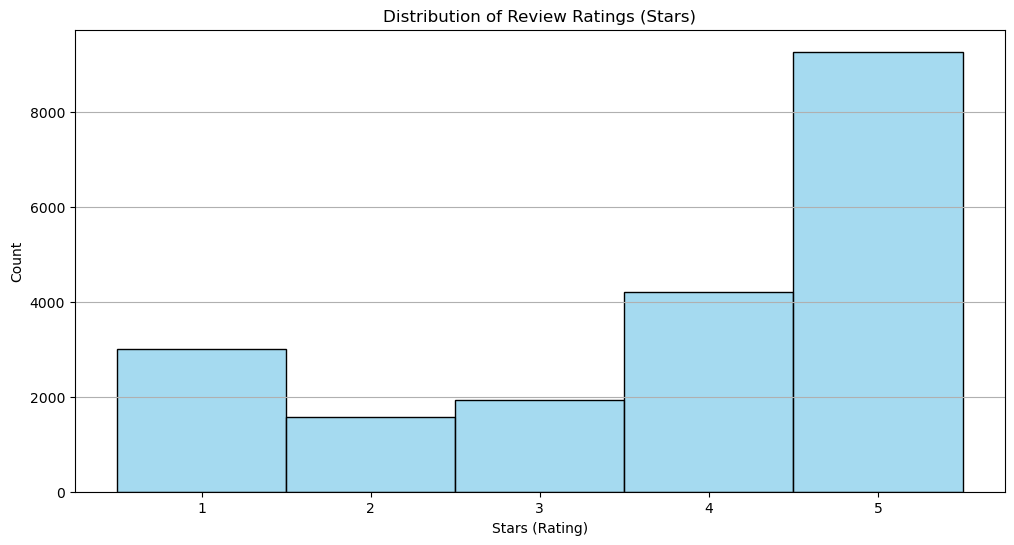

In [25]:
## Distribution of Reviews Ratings..
sns.histplot(reviews_df['stars'], bins=range(1, 7), kde=False, discrete=True, color='skyblue')

# Add titles and labels
plt.title("Distribution of Review Ratings (Stars)")
plt.xlabel("Stars (Rating)")
plt.ylabel("Count")

# Ensure the x-axis shows integer ticks only
plt.xticks(ticks=range(1, 6))

# Add gridlines for better readability
plt.grid(axis='y')

# Show the plot
plt.show()

C:\Users\vivek\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


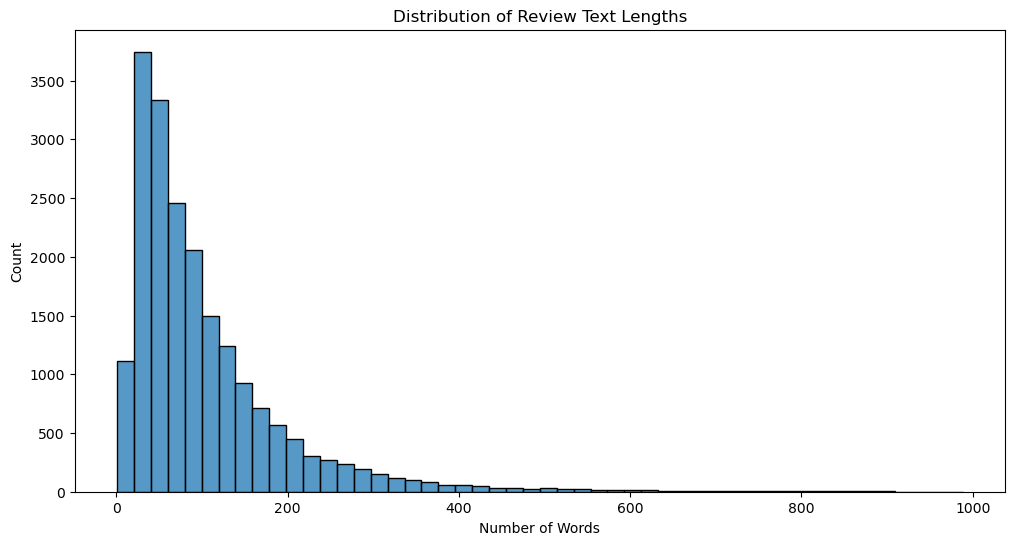

In [27]:
## Word count or Review Text Length
reviews_df['review_length'] = reviews_df['text'].apply(lambda x: len(str(x).split()))

# Plot the distribution of review text lengths
sns.histplot(reviews_df['review_length'], bins=50)
plt.title("Distribution of Review Text Lengths")
plt.xlabel("Number of Words")
plt.ylabel("Count")
plt.show()

C:\Users\vivek\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


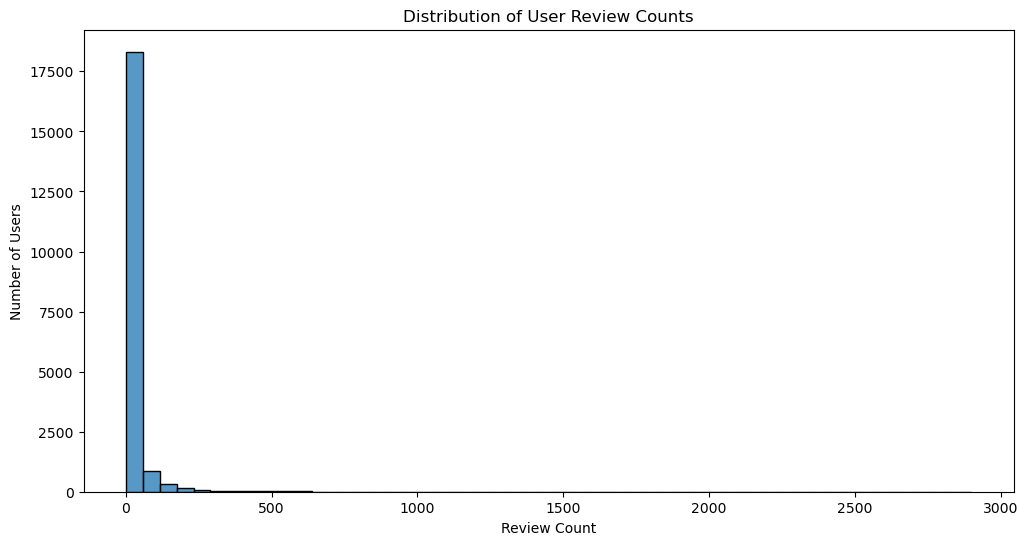

In [29]:
## User Review Count Distribution

sns.histplot(users_df['review_count'], bins=50)
plt.title("Distribution of User Review Counts")
plt.xlabel("Review Count")
plt.ylabel("Number of Users")
plt.show()

C:\Users\vivek\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


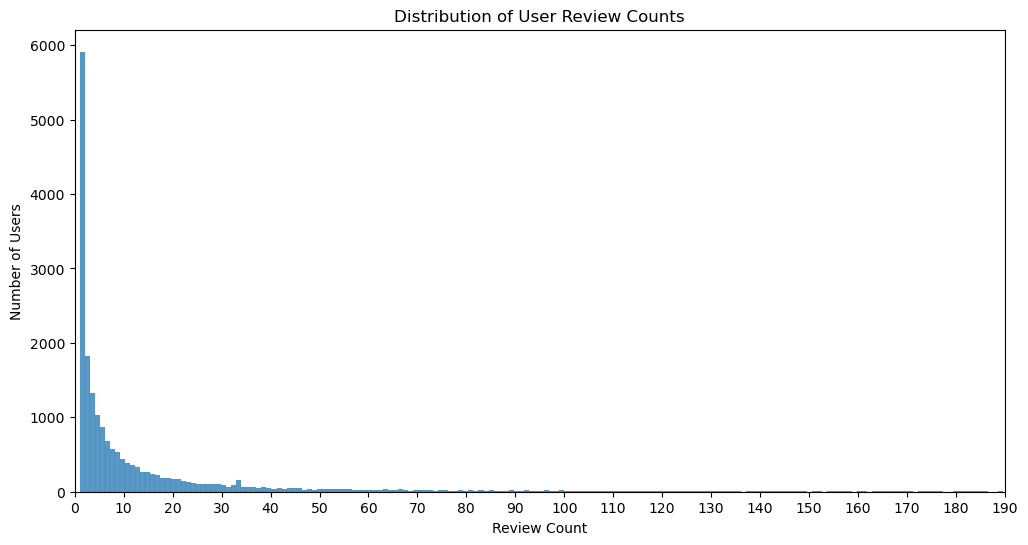

In [36]:
### Zooming further to see count of reviews per user
sns.histplot(users_df['review_count'])

# Add titles and labels
plt.title("Distribution of User Review Counts")
plt.xlabel("Review Count")
plt.ylabel("Number of Users")

# Zoom into the x-axis between 0 and 100
plt.xlim(0, 100)

# Adjust the x-ticks to show increments of 50
plt.xticks(ticks=[x for x in range(0, 200, 10)])

# Show the plot
plt.show()


C:\Users\vivek\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


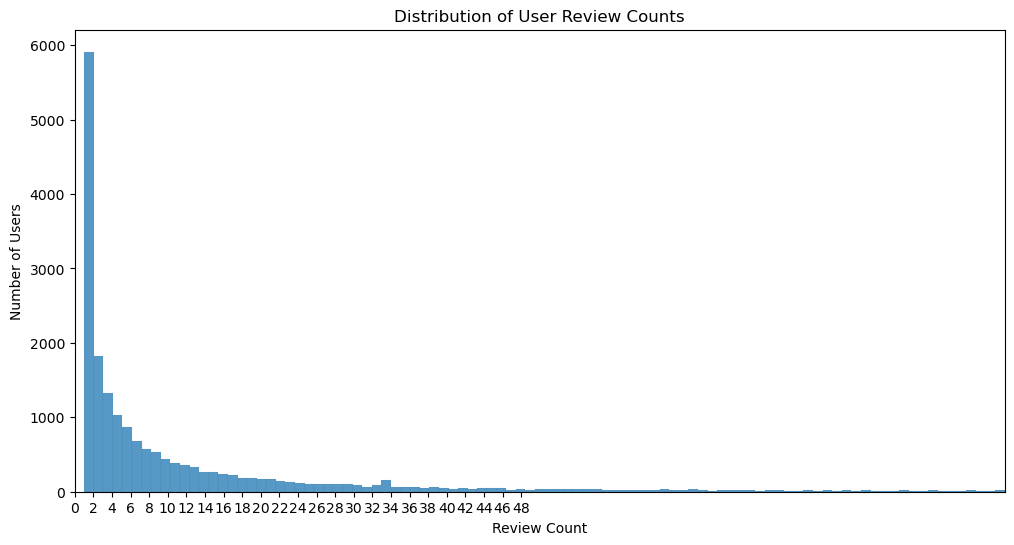

In [42]:
## Zooming further...

sns.histplot(users_df['review_count'])

# Add titles and labels
plt.title("Distribution of User Review Counts")
plt.xlabel("Review Count")
plt.ylabel("Number of Users")

# Zoom into the x-axis between 0 and 100
plt.xlim(0, 100)

# Adjust the x-ticks to show increments of 50
plt.xticks(ticks=[x for x in range(0, 50, 2)])

# Show the plot
plt.show()

C:\Users\vivek\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


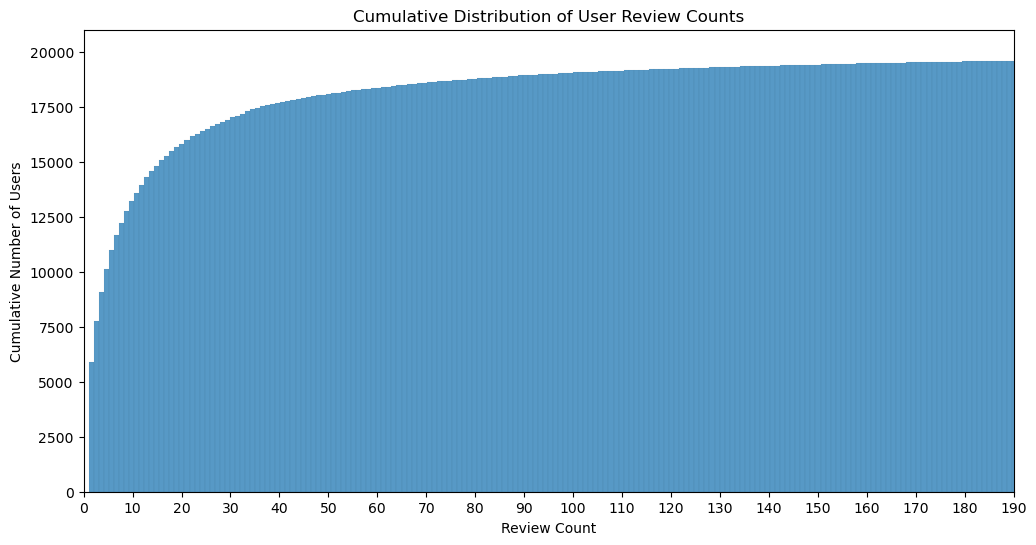

In [37]:
# Cumulative plot of the review counts
sns.histplot(users_df['review_count'], cumulative=True)

# Add titles and labels
plt.title("Cumulative Distribution of User Review Counts")
plt.xlabel("Review Count")
plt.ylabel("Cumulative Number of Users")

# Zoom into the x-axis between 0 and 100
plt.xlim(0, 100)

# Adjust the x-ticks to show increments of 10
plt.xticks(ticks=[x for x in range(0, 200, 10)])

# Show the plot
plt.show()

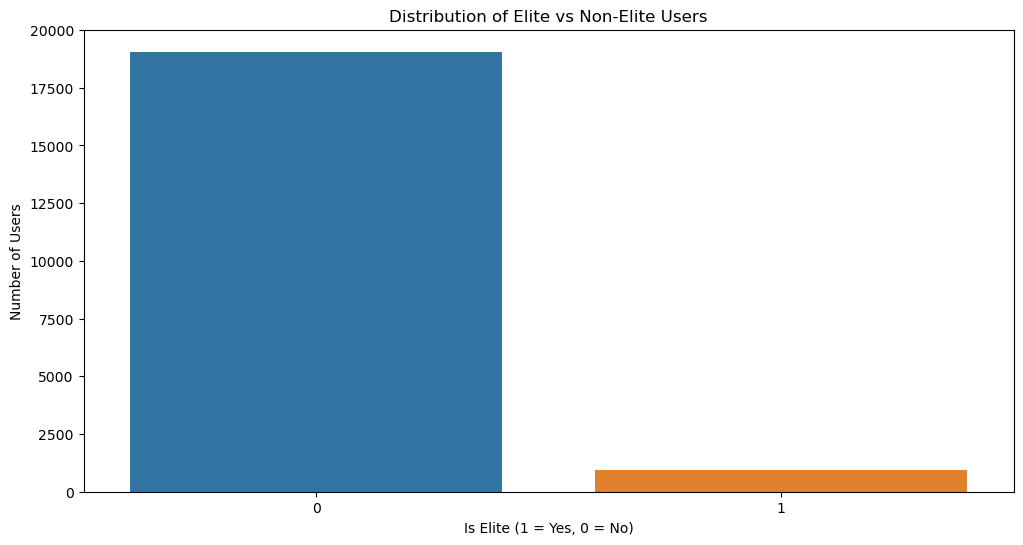

In [38]:
# Count elite vs non-elite users
users_df['is_elite'] = users_df['elite'].apply(lambda x: 0 if pd.isnull(x) else 1)

# Plot distribution of elite vs non-elite users
sns.countplot(x='is_elite', data=users_df)
plt.title("Distribution of Elite vs Non-Elite Users")
plt.xlabel("Is Elite (1 = Yes, 0 = No)")
plt.ylabel("Number of Users")
plt.show()

C:\Users\vivek\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


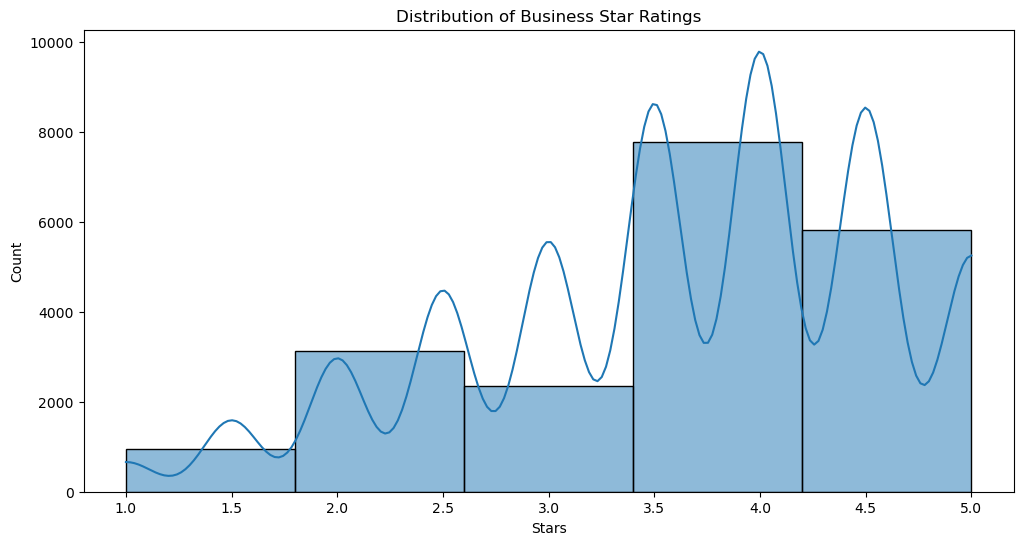

In [40]:
# Plot distribution of business star ratings
sns.histplot(businesses_df['stars'], bins=5, kde=True)
plt.title("Distribution of Business Star Ratings")
plt.xlabel("Stars")
plt.ylabel("Count")
plt.show()

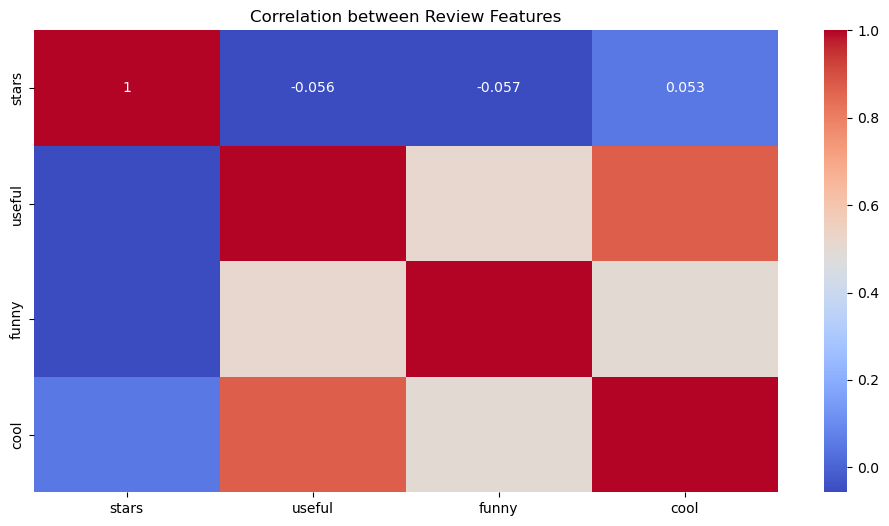

In [41]:
# Correlation between review features
correlation = reviews_df[['stars', 'useful', 'funny', 'cool']].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title("Correlation between Review Features")
plt.show()

### Conclusion from initial plots...

The concentration of 1-star ratings could warrant further investigation into whether these reviews are authentic or fabricated. An unusually high volume of negative reviews might suggest the presence of coordinated efforts to discredit certain businesses, possibly through fake reviews.

Similarly, an excessive number of high ratings (45%) could indicate inflated reviews. This may occur when businesses engage in unethical practices to boost their ratings, such as incentivizing positive reviews from customers or employing services that generate fake positive feedback.

*************************************************************************************************************************************************
Users who provide longer, more detailed reviews typically demonstrate greater engagement, which is often associated with genuine feedback.
The high number of users with very few reviews (1-2) could also suggest the presence of bots or fake accounts designed to generate quick reviews without genuine user experience. If many of these reviews are uniformly positive or negative, it may be indicative of coordinated efforts to manipulate the review system.

***************************************************************************************************************************************************

The significantly higher number of non-elite users (approx.18,000) compared to elite users (approx. 2,000) suggests that the majority of reviews come from a diverse, less recognized group. This could indicate a broader range of genuine experiences, reducing the risk of bias commonly associated with elite reviewers. **However, it also raises concerns about the authenticity of reviews from less engaged users, as many may be casual reviewers or bots**. 

#### User Behavior Analysis

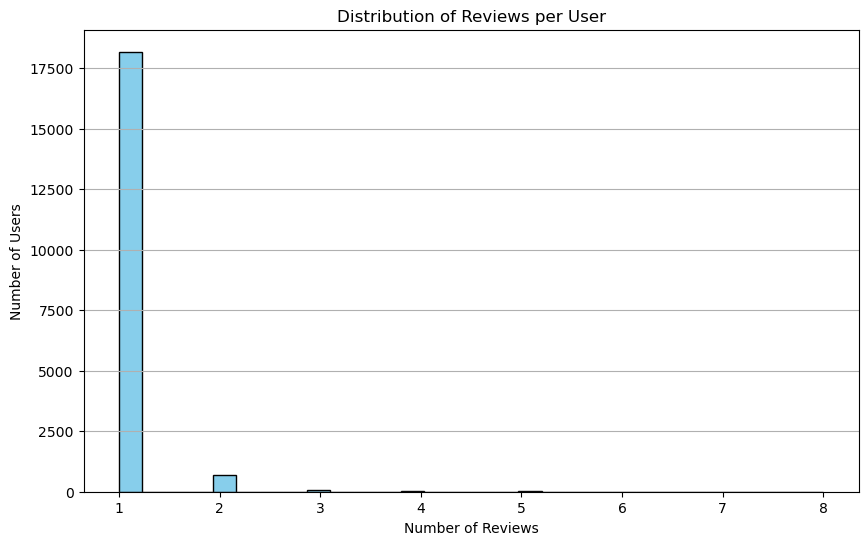

In [44]:
# Calculate the number of reviews per user
posting_frequency = reviews_df['user_id'].value_counts()

# Plotting the distribution of reviews per user
plt.figure(figsize=(10, 6))
plt.hist(posting_frequency, bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Reviews per User')
plt.xlabel('Number of Reviews')
plt.ylabel('Number of Users')
plt.grid(axis='y')
plt.show()


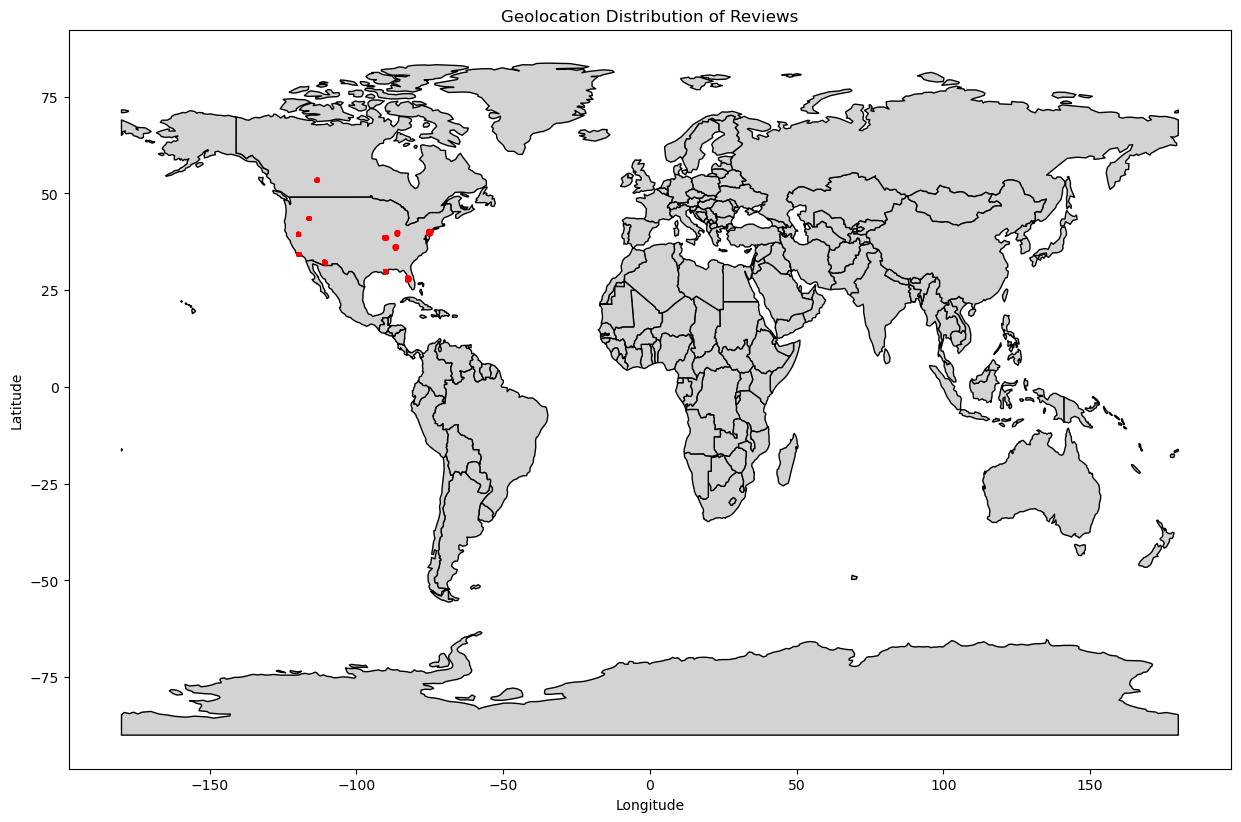

In [51]:
geo_df = gpd.GeoDataFrame(
    merged_df, 
    geometry=gpd.points_from_xy(merged_df['longitude'], merged_df['latitude']),
    crs="EPSG:4326"  # WGS84 Latitude/Longitude
)

# Load the downloaded shapefile (replace 'path_to_your_shapefile' with the actual path)
world = gpd.read_file('path_to_your_shapefile/ne_110m_admin_0_countries.shp')

# Plotting the geolocation distribution
ax = world.plot(color='lightgrey', edgecolor='black', figsize=(15, 10))
geo_df.plot(ax=ax, color='red', markersize=5, alpha=0.5)

plt.title('Geolocation Distribution of Reviews')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

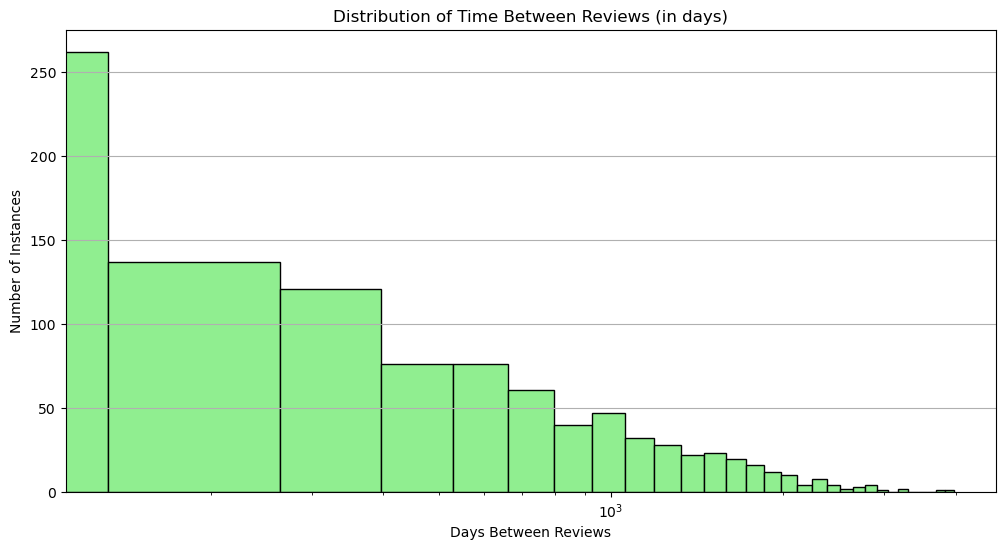

In [55]:
## Time intervals between reviews for each user
# Ensure the 'date' column in reviews_df is in datetime format
reviews_df['date'] = pd.to_datetime(reviews_df['date'])

# Sort reviews by user and date
reviews_sorted = reviews_df.sort_values(by=['user_id', 'date'])

# Calculate the time difference between consecutive reviews for each user
reviews_sorted['time_diff'] = reviews_sorted.groupby('user_id')['date'].diff()

# Convert time differences to a more usable format (in days)
reviews_sorted['time_diff_days'] = reviews_sorted['time_diff'].dt.days

# Plotting the distribution of time differences

plt.hist(reviews_sorted['time_diff_days'].dropna(), bins=30, color='lightgreen', edgecolor='black')
plt.title('Distribution of Time Between Reviews (in days)')
plt.xlabel('Days Between Reviews')
plt.ylabel('Number of Instances')
plt.xscale('log')  # Log scale to handle large variations
plt.grid(axis='y')
plt.show()



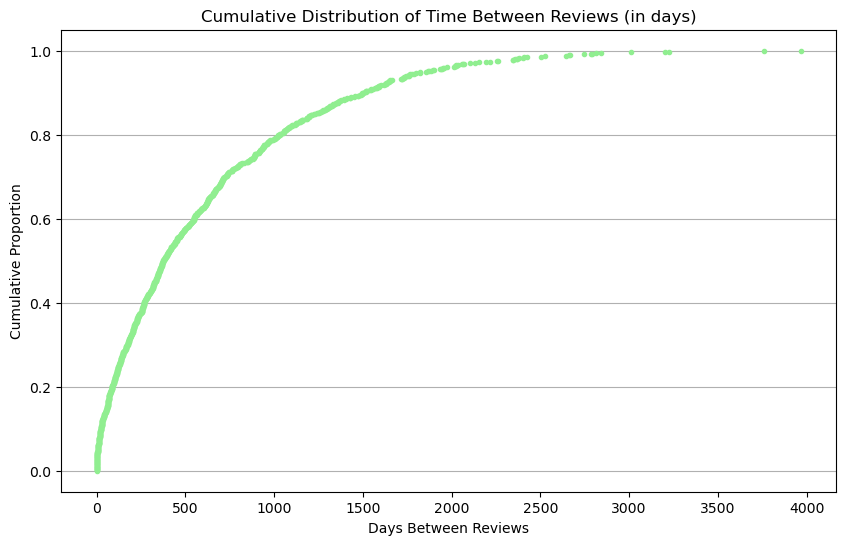

In [58]:
### Cummulative plots
plt.figure(figsize=(10, 6))
sorted_time_diff = np.sort(reviews_sorted['time_diff_days'].dropna())
cdf = np.arange(1, len(sorted_time_diff) + 1) / len(sorted_time_diff)

plt.plot(sorted_time_diff, cdf, marker='.', linestyle='none', color='lightgreen')
plt.title('Cumulative Distribution of Time Between Reviews (in days)')
plt.xlabel('Days Between Reviews')
plt.ylabel('Cumulative Proportion')
plt.grid(axis='y')
plt.show()


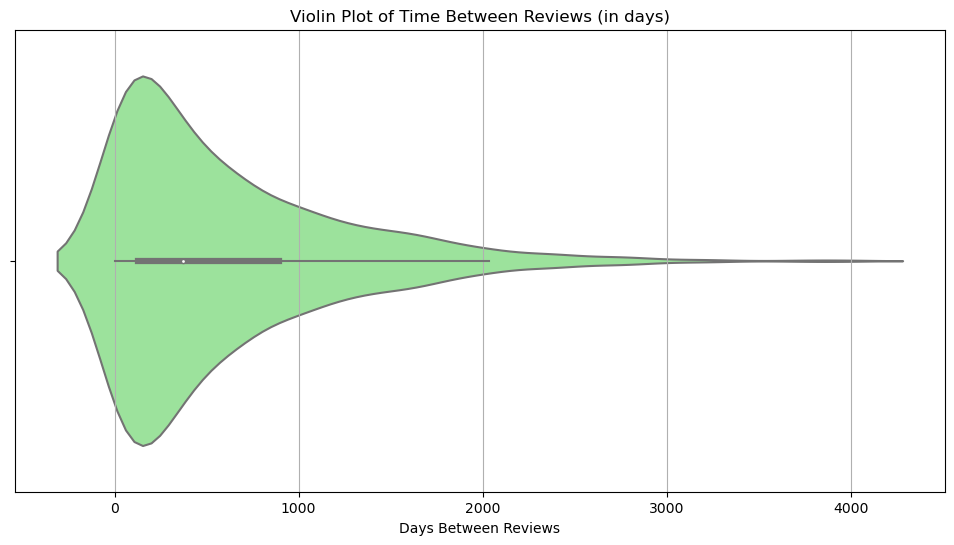

In [60]:
sns.violinplot(x=reviews_sorted['time_diff_days'].dropna(), color='lightgreen')
plt.title('Violin Plot of Time Between Reviews (in days)')
plt.xlabel('Days Between Reviews')
plt.grid(axis='x')
plt.show()


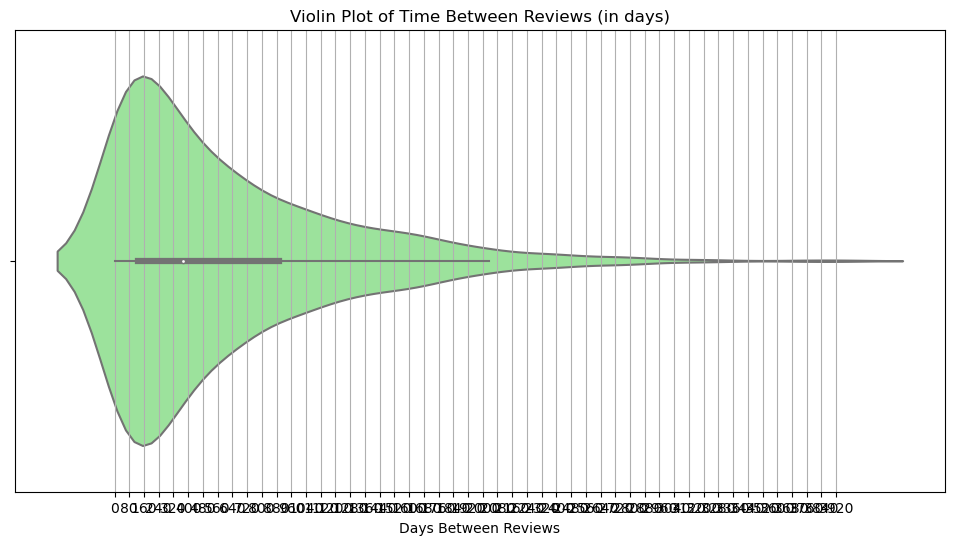

In [63]:
sns.violinplot(x=reviews_sorted['time_diff_days'].dropna(), color='lightgreen')
plt.title('Violin Plot of Time Between Reviews (in days)')
plt.xlabel('Days Between Reviews')
plt.grid(axis='x')

# Set x-ticks with smaller gaps
plt.xticks(ticks=range(0, int(reviews_sorted['time_diff_days'].max()) + 20, 80))

plt.show()


In [67]:
### Identifying anomalous users

# Calculate the number of reviews per user
reviews_sorted = reviews_df.sort_values(by=['user_id', 'date'])
review_counts = reviews_df['user_id'].value_counts().reset_index()
review_counts.columns = ['user_id', 'review_count']

# Display the top users with the most reviews
print(review_counts.sort_values(by='review_count', ascending=False).head(10))




                   user_id  review_count
0   qjfMBIZpQT9DDtw_BWCopQ             8
1   _BcWyKQL16ndpBdggh2kNA             7
2   2iS1vg5TYpV_iEiNC8osTg             6
10  1HM81n6n4iPIFU5d2Lokhw             5
17  IKbjLnfBQtEyVzEu8CuOLg             5
15  T4Pq2T8WGExBbFGX6XPpYQ             5
14  eTvp_hYnsrI5-ow_sQ31_g             5
13  ET8n-r7glWYqZhuR6GcdNw             5
12  1KVMrASElCoqaPOBqHeY1g             5
11  cIVmIJD7nIiEcVGamfBoVw             5


In [77]:
# Calculate average time between reviews for each user
average_time_between_reviews = reviews_sorted.groupby('user_id')['time_diff_days'].mean().reset_index()
average_time_between_reviews.columns = ['user_id', 'avg_time_between_reviews']

# Convert average time between reviews to minutes
average_time_between_reviews['avg_time_between_reviews_minutes'] = average_time_between_reviews['avg_time_between_reviews'] * 1440  # 1 day = 1440 minutes

# Merge with review counts for comprehensive analysis
user_behavior_analysis = pd.merge(review_counts, average_time_between_reviews, on='user_id')

# Sort the DataFrame in descending order based on average time between reviews in minutes
sorted_user_behavior = user_behavior_analysis.sort_values(by='avg_time_between_reviews_minutes', ascending=True)

# Display the sorted DataFrame
print(sorted_user_behavior[['user_id', 'review_count', 'avg_time_between_reviews_minutes']].head(50))


                    user_id  review_count  avg_time_between_reviews_minutes
808  RLBvedrn58ov2qy3fLx2fg             2                               0.0
148  LSIetrH3YH6mdyhzT_gJrQ             2                               0.0
720  jXhSMz7KxMixxvcNDMx7Tg             2                               0.0
766  eYF7zoD8A70hcei4kMsUyw             2                               0.0
136  lAjG1vO_n5sVrtl24jHTKg             2                               0.0
131  Y2zyU6r6bA57OI9ZtBm8wA             2                               0.0
522  1msVg_B-Ef6K814sQDOTPA             2                               0.0
235  evQ4WKf7jy_jHrB396nehg             2                               0.0
518  1jvCpDE85Dk64-SA6bmYUg             2                               0.0
788  UIecz9EWpUZrmYEy0tVQjg             2                               0.0
111  bezS3vZaYFkgr4ocQ_N6oA             3                               0.0
261  vtRc2ApxN_qYuPDWXAMvtQ             2                               0.0
661  BnGCmZR

In [80]:
print(sorted_user_behavior[['user_id', 'review_count', 'avg_time_between_reviews_minutes']].tail(10))

                      user_id  review_count  avg_time_between_reviews_minutes
18977  oWQvvQjPs2TT6V6Uuk72iQ             1                               NaN
18978  4DGp0VMe8oaA5MTnNy3i5Q             1                               NaN
18979  jnb6xyaUoi7AG3Ji8sPWRQ             1                               NaN
18980  nbW40P8nZ9msqiCQvSRYIQ             1                               NaN
18981  SO8T4QzkwXV7oV8QNrD5Dg             1                               NaN
18982  3cVKZ8Cc2kfm6Hi9SVlHRw             1                               NaN
18983  2VGqBi9Y-WCkZrUOVjg9lg             1                               NaN
18984  LKlxo98EMCf6w9o-xwo33g             1                               NaN
18985  hdTqGboNFwwlu7cxDlfSIA             1                               NaN
18986  X5L7ohBZehBNijyQcJk7Rw             1                               NaN


In [81]:
# Define thresholds for unusual behavior
high_review_threshold = user_behavior_analysis['review_count'].quantile(0.95)  # 95th percentile for high review count
low_time_threshold = user_behavior_analysis['avg_time_between_reviews'].quantile(0.05)  # 5th percentile for low average time

# Filter users exhibiting unusual behavior
unusual_users = user_behavior_analysis[
    (user_behavior_analysis['review_count'] > high_review_threshold) |
    (user_behavior_analysis['avg_time_between_reviews'] < low_time_threshold)
]

unusual_users

,user_id,review_count,avg_time_between_reviews,avg_time_between_reviews_minutes
0,qjfMBIZpQT9DDtw_BWCopQ,8,348.857143,5.023543e+05
1,_BcWyKQL16ndpBdggh2kNA,7,686.666667,9.888000e+05
2,2iS1vg5TYpV_iEiNC8osTg,6,435.600000,6.272640e+05
3,mzL0zHFGyd9866OUljq49g,5,119.500000,1.720800e+05
4,h7p-GuaHFGsiKCF4g6Bjqg,5,273.500000,3.938400e+05
...,...,...,...,...
804,GL18myzHd62C39MrHdBXQw,2,53.000000,7.632000e+04
805,EMJV9rib660I4RpMsbzWbg,2,135.000000,1.944000e+05
806,Sj9CtAwUaA3vyDOTWigqXg,2,1326.000000,1.909440e+06
807,Ip-XdrL7uInJmkpPY6OMhw,2,660.000000,9.504000e+05


##### Conclusion...

Zero Average Time: Many users (such as the first 50 in this list) show an average time between reviews of 0 minutes. This suggests that these users may have posted multiple reviews in a very short time frame, which can be a strong indicator of suspicious or inauthentic behavior. It's unusual for genuine users to leave reviews back-to-back without any time gap, especially if they are providing thoughtful feedback.

Short Average Times: Some users have extremely short average times (such as 1,440 minutes or 24 hours). While this might be reasonable for a highly active user, it still raises flags. Frequent posting over a short duration can indicate either highly engaged users or potential bots/fake accounts designed to flood the platform with reviews.


 If a user has only posted one review, there is no previous review to compare it to. Therefore, the time difference cannot be calculated, resulting in a NaN value for that user (last 10 users in our case).

#### NOTE : This analysis is limited ot